<a href="https://colab.research.google.com/github/Kihiko-Peter/Obesity-Level-Clustering/blob/main/OBESITY_LEVELS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBESITY LEVEL CLUSTERING**

## 1. Define the question.

### a) Specifying the question.

To levearage various unsupervised methods of machine towards estimating people prone or with Obesity through various ways of clustering.

### b) The Metric of success.

Building a model with a high enough merit score and deploy that model on Flask.

### c) Understanding the contest.
Obesity and being overweight together make up one of the leading preventable causes of death in the world, and especially high income countries. Obesity is a major health problem strongly associated with many chronic illnesses with negative effects and long-term consequences, not only for the patients but also their families. Being overweight means that a person has extra body weight while obesity means having a high amount of extra body fat. Being overweight or obese raises the risk for health problems. These include coronary heart disease, type 2 diabetes, asthma, high cholesterol, osteoarthritis, high blood pressure, sleep apnea, and certain types of cancer 

### d) Recording the experimental design.

To identify the levels of obesity based on the factors of eating and physical condition provided in the dataset.

1. To find the value of BMI for each person.
2. To investigate the age ranges where the types of obesity are more common and the reason. 
3. To ascertain the gender more at risk of obesity and investigate the lifestyle choices that contribute to this.
ions.

# **DATA PREPARATION**

# Importing required libraries

In [ ]:
#first, we shall import the different python libraries that we are going to use

#Reading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from importlib import reload

In [ ]:
#We can now read our dataset
Dataset = ("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

def read (data):
  return pd.read_csv(data)

obese = read(Dataset)


# Reading the dataset

In [ ]:
# A function that displays all the info about the dataset

def disp (y):
  print("OUR DATA INFO IS AS FOLLOWS;")
  print(y.info())
  print("*************************************")
  print("THE DATASET HAD THESE NO: OF COLUMNS")
  print(y.columns)
  print("*************************************")
  print("THE DATA HAD THESE AMOUNT OF MISSING VALUES")
  print(y.isnull().sum())
  print("*************************************")
  
disp(obese)

OUR DATA INFO IS AS FOLLOWS;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF  

In [ ]:
#checking the shape of our dataset
def shape_data (x):
    return ('Number of records in our obesity dataset is: ' + str(x.shape))
shape_data(obese)

'Number of records in our obesity dataset is: (2111, 17)'

The output shows that our dataset has 2,111 entries with 17 columns

In [ ]:
#checking for the statistical summary of our dataset
obese.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# **DATA CLEANING**

In [ ]:
#renaming the columns
obese.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# Renaming the column names into something more appropriate

def rename ():
    obese.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
          'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
          'Consumption of alcohol', 'Transportation used', 'Obesity']
    return obese.head()
rename()
    


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#we can see that some rows in the age column have decimal points, therefore we round them off. 
#Also replacing the hyphens in the trasportation used and obesity columns
 
def clean ():
    obese['Obesity'] = obese['Obesity'].apply(lambda x: x.replace('_', ' '))
    obese['Transportation used'] = obese['Transportation used'].apply(lambda x: x.replace('_', ' '))
    return obese
clean ()


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


# Checking for Duplicates

In [ ]:
#let's check for any duplicated values

def duplicated_val (r; pd.DataFrame):
     """
     This function checks for duplicates
     """
    print(r.duplicated(subset=None, keep='first'))
    #hence, print the sum of duplicated values
    print(r.duplicated().sum())
    r.drop_duplicates()
    
    
duplicated_val(obese)

0       False
1       False
2       False
3       False
4       False
        ...  
2106    False
2107    False
2108    False
2109    False
2110    False
Length: 2111, dtype: bool
24


There are 24 duplicated values & we dropped them.

# Checking for Cardinality

In [ ]:
#@title Default title text
# Check Cardinality
# We will use a for loop function to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the obesity dataset
def cardinal (u):
    print('Cardinality of the dataset columns:\n')
    for i in u.columns:
      print(f'{i:<17} : {u[i].nunique()}')
      
cardinal(obese)

Cardinality of the dataset columns:

Gender            : 2
Age               : 1402
Height            : 1574
Weight            : 1525
Family History with Overweight : 2
Frequent consumption of high caloric food : 2
Frequency of consumption of vegetables : 810
Number of main meals : 635
Consumption of food between meals : 4
Smoke             : 2
Consumption of water daily : 1268
Calories consumption monitoring : 2
Physical activity frequency : 1190
Time using technology devices : 1129
Consumption of alcohol : 4
Transportation used : 5
Obesity           : 7


Weight, Height, Consumption of water daily, Physical activity frequency, and time using technology devices columns have very large number of unique variables.

In [ ]:
#Describe the data
# Printing the unique values
def unique_val(e):
  columns = e.columns
  for i in columns:
    print('Unique values in', i , 'are :')
    print(e[i].unique())
    print('number of unique values',len(e[i].unique()))
    print('                                                                           ')
    print('***************************************************************************')
    
unique_val(obese)

Unique values in Gender are :
['Female' 'Male']
number of unique values 2
                                                                           
***************************************************************************
Unique values in Age are :
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
number of unique values 1402
                                                                           
***************************************************************************
Unique values in Height are :
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
number of unique values 1574
                                                                           
***************************************************************************
Unique values in Weight are :
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
number of unique values 1525
                                                                           
**********************

# Checking for outliers

Boxplot visualization

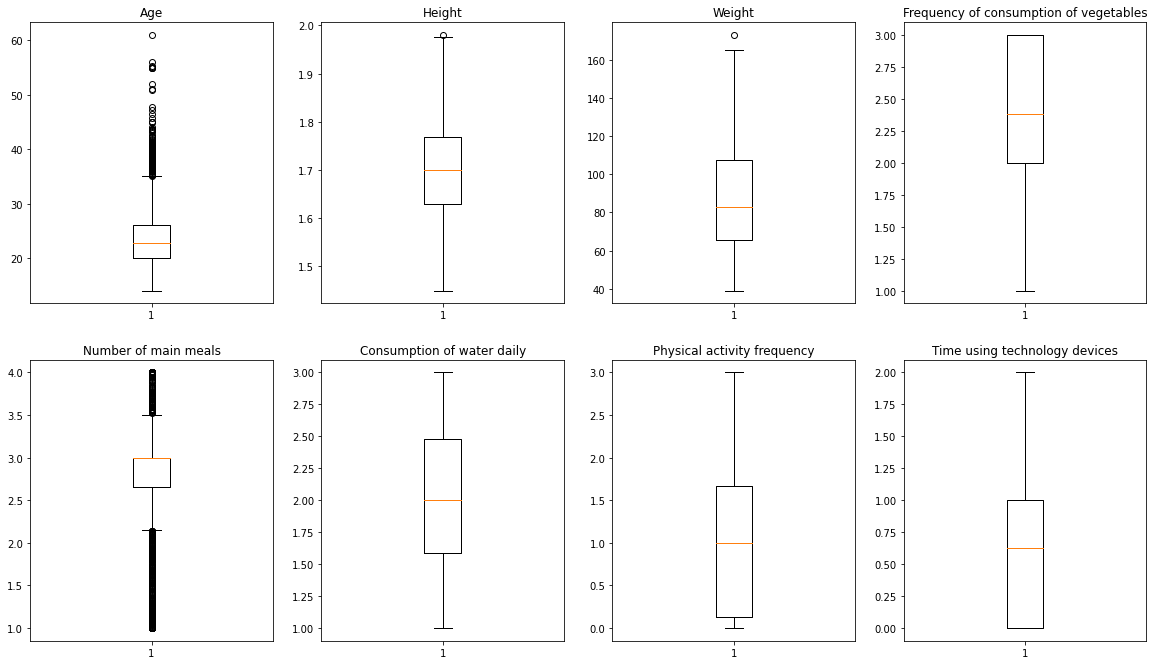

In [ ]:

# checking for outliers
# making a dictionary for numerical columns
def outliers ():
    columns_dict = {'Age': 1, 'Height': 2, 'Weight': 3, 'Frequency of consumption of vegetables': 4, 'Number of main meals': 5, 'Consumption of water daily': 6,
                    'Physical activity frequency': 7, 'Time using technology devices': 8}
    plt.figure(figsize=(20,30))
    for variable,i in columns_dict.items():
      plt.subplot(5,4,i)
      plt.boxplot(obese[variable])
      plt.title(variable)
    plt.show()
outliers()

From the output, we can see that;

- The age column has outliers. This is expected as people have different ages

- Height column also has outliers

- Weight also has outliers. People interviewed have different weight ranges

- Frequency of vegetable consumption column has no outliers

- There are outliers aslo in the number of main meals column.

- Time using technology devices shows no outliers as well

In [ ]:
# we shall check whether the outliers will skew our data or not LOL!
# making a dictionary for numerical columns
def check_skew():
    columns_dict = {'Age': 1, 'Height': 2, 'Weight': 3, 'Frequency of consumption of vegetables': 4, 'Number of main meals': 5, 'Consumption of water daily': 6,
                    'Physical activity frequency': 7, 'Time using technology devices': 8}

    # make a max/min for each numerical column
    for variable,i in columns_dict.items():
      print('The minimum & the maximum value in', variable , 'is :' )
      print(obese[variable].min()),print(obese[variable].max())
      # print('The maximum value in', variable , 'is :')
      # print(obese[variable].max())

check_skew()
 



The minimum & the maximum value in Age is :
14.0
61.0
The minimum & the maximum value in Height is :
1.45
1.98
The minimum & the maximum value in Weight is :
39.0
173.0
The minimum & the maximum value in Frequency of consumption of vegetables is :
1.0
3.0
The minimum & the maximum value in Number of main meals is :
1.0
4.0
The minimum & the maximum value in Consumption of water daily is :
1.0
3.0
The minimum & the maximum value in Physical activity frequency is :
0.0
3.0
The minimum & the maximum value in Time using technology devices is :
0.0
2.0


- The above output was to confirm that despite the presence of outliers, they won't affect our analysis

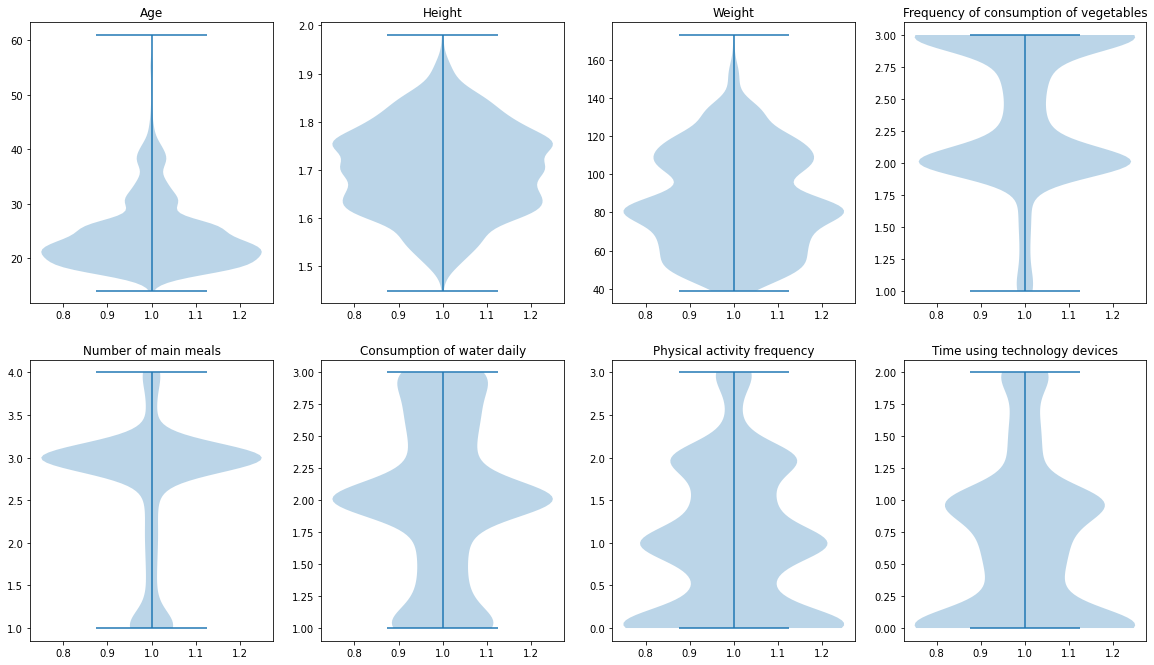

In [ ]:
# VISUALIZING THE DISTRIBUTION OF THE NUMERICAL DATA (BETTER)
# making a dictionary for numerical columns
def violin_plot (m):
    columns_dict = {'Age': 1, 'Height': 2, 'Weight': 3, 'Frequency of consumption of vegetables': 4, 'Number of main meals': 5, 'Consumption of water daily': 6,
                    'Physical activity frequency': 7, 'Time using technology devices': 8}

    plt.figure(figsize=(20,30))

    # make a boxplot for each numerical column
    for variable,i in columns_dict.items():
      plt.subplot(5,4,i)
      plt.violinplot(obese[variable])
      plt.title(variable)

    plt.show()
    
violin_plot (obese)

*   People between the age of 18-25 are likely to be obese

*   People between 1.6 and 1.8 metres are more prone to obesity

*   People who have an average consumption of vegetables and those who have a high frequency of vegetable consumption are prone to obese
*   People who are between 70-80kgs and 110-120kgs are likely to be obese


*   People who are prone to obesity spend more time on technological devices(above average)

# **EXPLORATORY DATA ANALYSIS**

# a) Univariate Analysis

Frequency table assessment

In [ ]:
# Frequency distribution of features in the dataset
def frequency(k):
  for var in k.columns:
      print(k[var].value_counts())

frequency(obese)

Male      1068
Female    1043
Name: Gender, dtype: int64
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: Weight, Length: 1525, dtype: int64
yes    1726
no      385
Name: Family History with Overweight, dtype: int64
yes    1866
no      245
Name: Frequent consumption of high caloric food, dtype: int64
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134   

From the output;

*   There were more males than female who are likely to be obese. There are more 1068 males while female are 1043
*   People who are 26 years are the highest with a frequency of 146


*   People who are 1.7metres are the most prone to obesity in terms of frequency
*   people weighing 80kg are the most in terms of frequency.


*   From the analysis, people with family history of overweight are more likely to be obese
*  Similarly, frequent consumption of high caloric food increases the chances of one being obese


*   people are take vegetables frequently are likely to get obese

*   people who sometimes take meals between main are more prone to be obese
*   People who consume water daily are unlikely to be obese


*   People who do not monitor their calory intake are likely to be obese
*   people who do not exercise or involve in any physical activity are more prone to obesity




*   List item

In [ ]:
obese.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'Smoke',
       'Consumption of water daily', 'Calories consumption monitoring',
       'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity'],
      dtype='object')

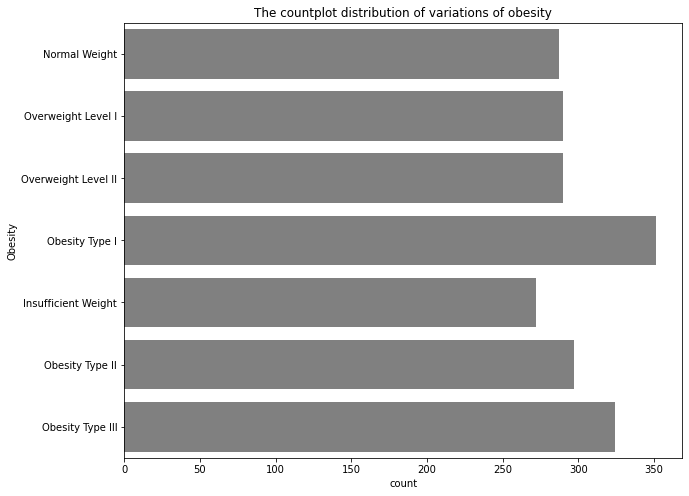

In [ ]:
#A count plot for the outcome classificaton
def outcome_class(n):
      plt.figure(figsize=(10,8))
      plt.title("The countplot distribution of variations of obesity")
      # sns.countplot(obese.Obesity)
      ax = sns.countplot(y=n, data=obese, color = 'grey')

outcome_class(obese.Obesity)

Histograms

<Figure size 1000x300 with 0 Axes>

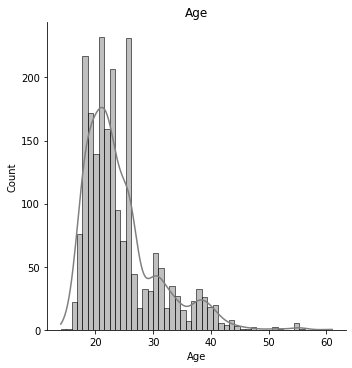

<Figure size 1000x300 with 0 Axes>

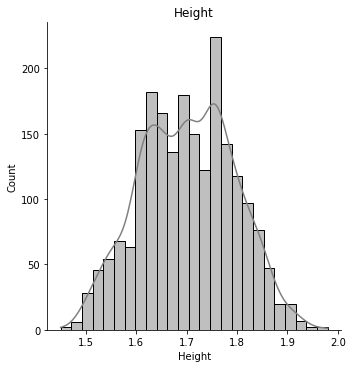

<Figure size 1000x300 with 0 Axes>

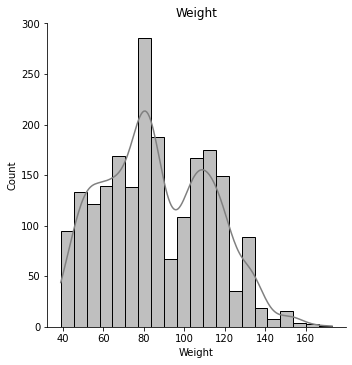

<Figure size 1000x300 with 0 Axes>

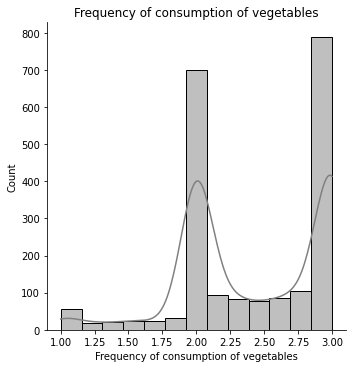

<Figure size 1000x300 with 0 Axes>

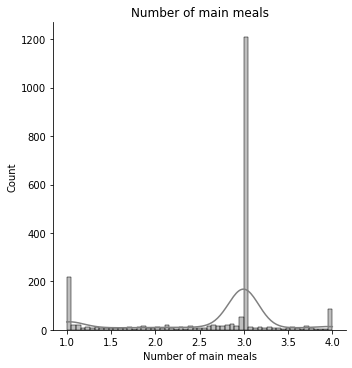

<Figure size 1000x300 with 0 Axes>

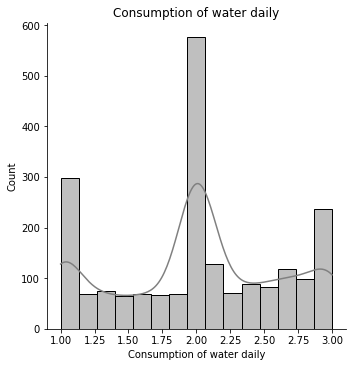

<Figure size 1000x300 with 0 Axes>

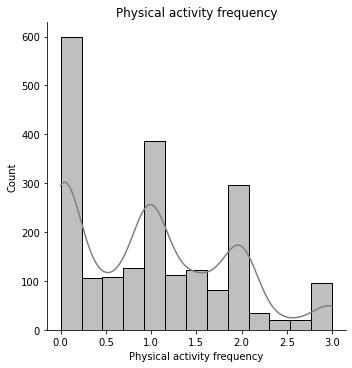

<Figure size 1000x300 with 0 Axes>

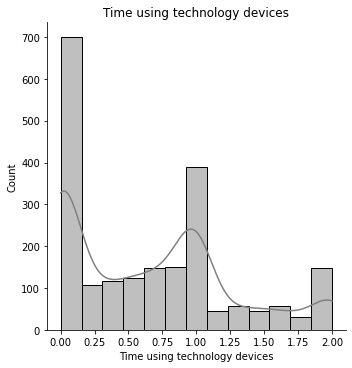

In [ ]:
#PLotting histrograms for categorical values
def histogram (v):
    columns_dict = {'Age': 1, 'Height': 2, 'Weight': 3, 'Frequency of consumption of vegetables': 4, 'Number of main meals': 5, 'Consumption of water daily': 6,
                    'Physical activity frequency': 7, 'Time using technology devices': 8}
    for i in columns_dict:
      plt.figure(figsize = (10,3), dpi=100)
      sns.displot(v[i], kde = True, color = 'grey')
      plt.title(i, color = 'Black')
      plt.show()

histogram (obese)

- According to to the histograms 
1. Most people are between the ages of 20 - 30 (young)
2. Most people are 1.6 to 1.8 in height (average height)
3. Most people are between 70 - 80 in weight
4. Most people have 3 meals a day
5. Most people consume vegetables 3 times a day
6. Most people have 2 glasses of water a day
7. Most people have no physical exercises
8. Most people dont use technnology devices

Piechart function

In [ ]:
# Creating pie charts for columns
def pie(obese,column):
  data=obese[column].value_counts()
  sns.set(font_scale=1.4)
  plt.figure(figsize=(7,6))
  explode = (0, 0.1)
  colors = ['grey','grey']
  pie=data.plot.pie(autopct='%1.1f%%',labels=(obese[column].unique()),startangle=0,explode=explode, colors = colors)
  plt.axis('equal')
  plt.title=(f'{column}'" DISTRIBUTION")
  plt.show()
  return plt.show()

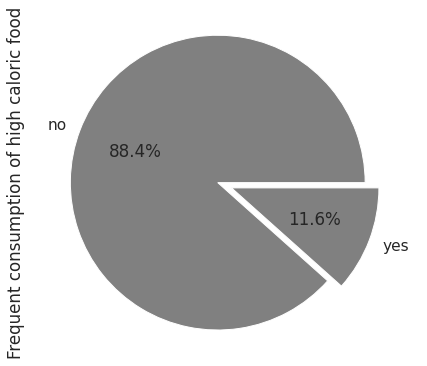

In [ ]:
pie(obese,'Frequent consumption of high caloric food')

- Most people don't consume food rich in calories but most people have different forms of obesity.

# b) Bivariate Analysis

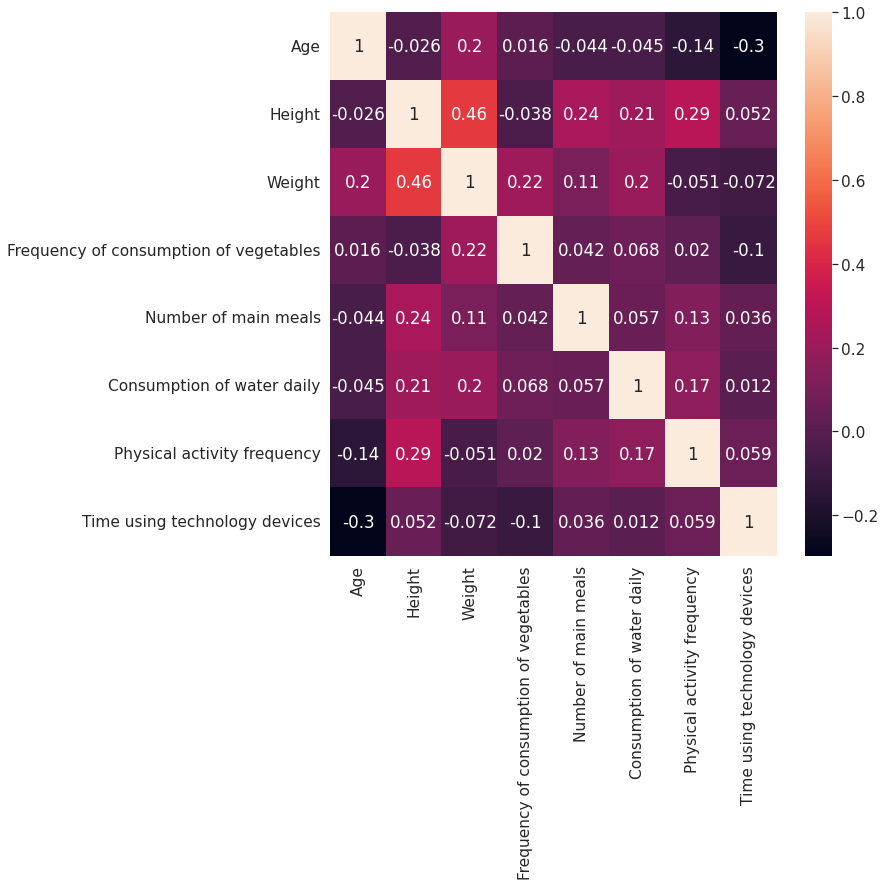

In [ ]:
# Plotting a correlation matrix
def cormatrix (g):
    plt.subplots(figsize=(10,10))
    sns.heatmap(g.corr(), annot=True)
    plt.show()

cormatrix (obese)

- The correlation between the variables wasnt that bad as it ranged on the lower quartiles of having a direct relationship.

A crossbar bargraph

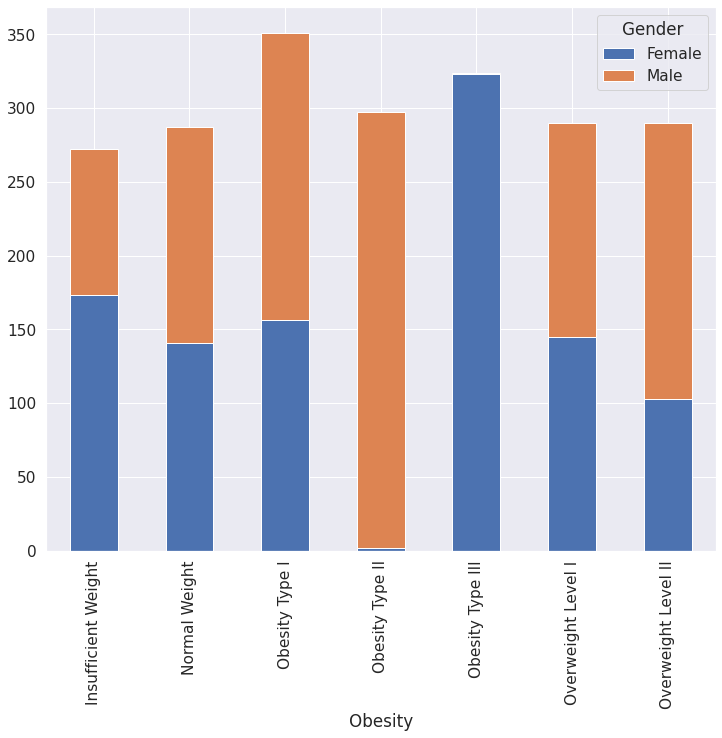

In [ ]:
# plotting a crosstab bar graph of the relationship between obesity and Gender

def crosstab (x,y):
    return (pd.crosstab(obese[x],obese[y]).plot(kind='bar', stacked=True, figsize=(12,10)))
crosstab ("Obesity", "Gender")


- The people that have type I obesity are male and most females have obesity type III

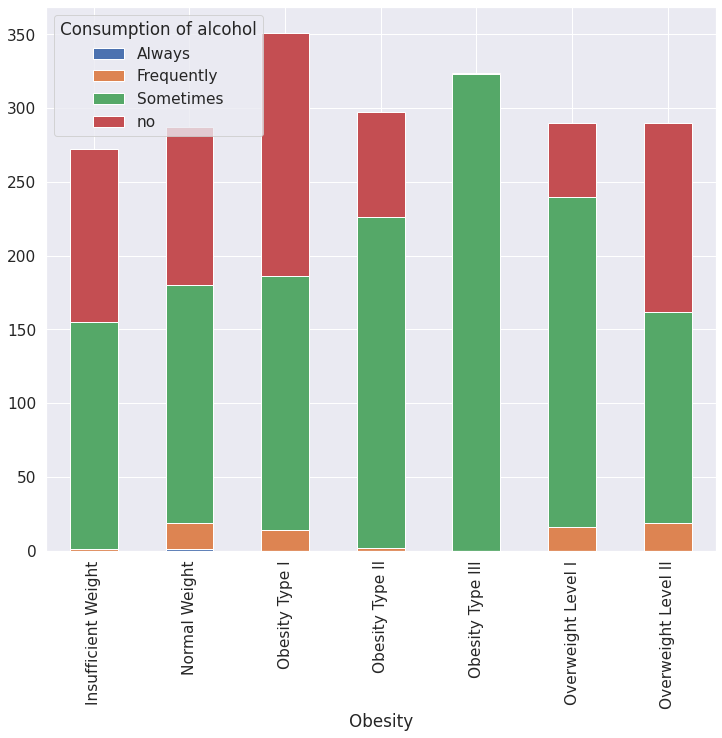

In [ ]:
# plotting a crosstab bar graph of the relationship between obesity and Consumption of alcohol

crosstab ("Obesity", "Consumption of alcohol")

- Most people have type I obesity and do not consume alcohol and most people that sometimes consume alcohol have obesity type III

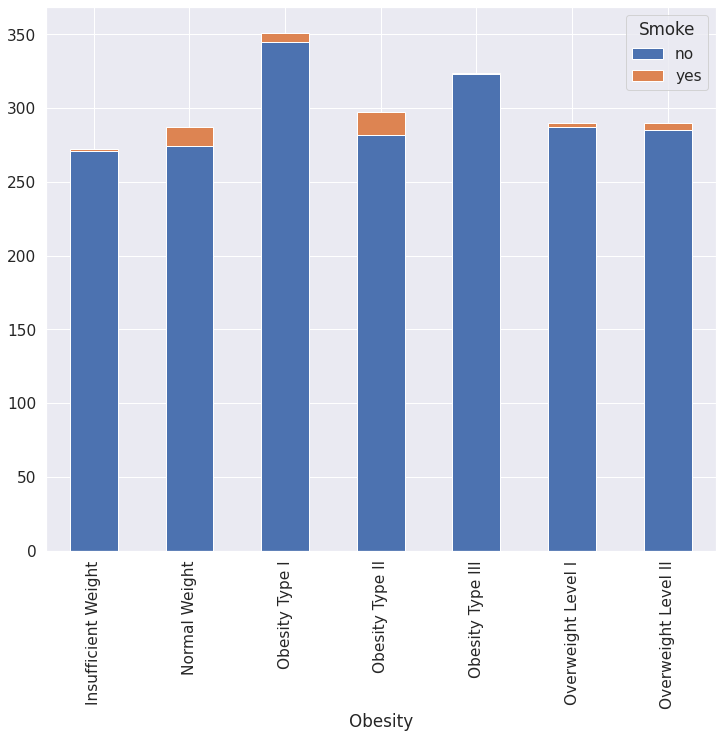

In [ ]:
# plotting a crosstab bar graph of the relationship between obesity and people who Smoke

crosstab ("Obesity", "Smoke")

- From our output we can see that smoking wasnt a major factor when it comes to obesity.

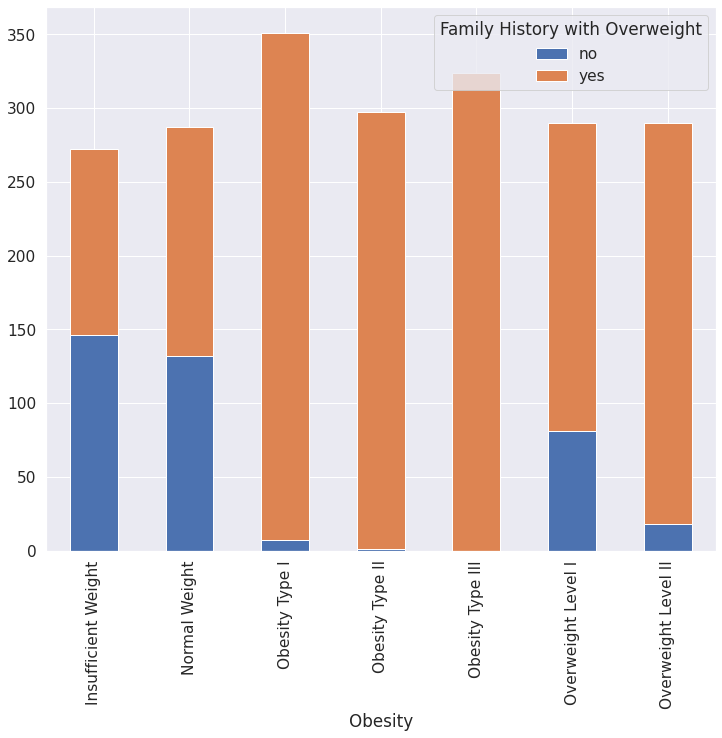

In [ ]:
# plotting a crosstab bar graph of the relationship between obesity and people who have Family History with Overweight 

crosstab ("Obesity", "Family History with Overweight")

- In all the obesity level types, people with family history of overweight are more likely to be obese

A combo chart

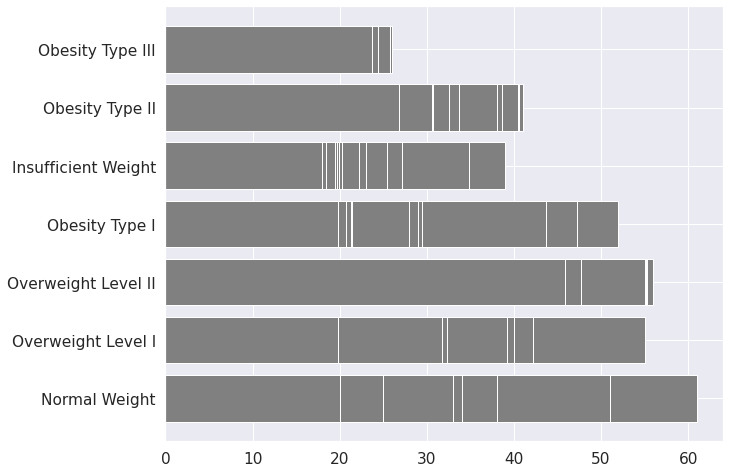

In [ ]:
#To explore the relationship between the target variable and age
def combo (x,y):
    fig = plt.figure(figsize=(10,8))
    ax1 = plt.subplot(1,1,1)
    ax1.barh(obese[x], obese[y],color= "grey")
    plt.show()
combo('Obesity','Age')



- Obesity type III majorly affected people young people of age 30 and below

## **Feature Engineering**

In [ ]:
# Making a column for body mass index
obese["Body Mass Index"] = obese.Weight / (obese.Height**2)
obese.head(1)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,Body Mass Index
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.386526


In [ ]:
#An impromtu BMI calculator
def BMI_cal (): 
        the_name =str(input("Enter your name: "))
        the_height = float(input("Enter the height in meters: "))  
        the_weight = float(input("Enter the weight in kg: ")) 
        the_BMI = the_weight / (the_height**2)  
        # printing the BMI  
        print("Your Body Mass Index is", the_BMI)  
        # using the if-elif-else conditions  
        if the_BMI <= 18.5:  
            print("Oops! You are underweight.")  
        elif the_BMI <= 24.9:  
            print("Awesome! You are healthy.")  
        elif the_BMI <= 29.9:  
            print("Ease! You are over weight.")  
        else:  
            print("Sorry! You are obese.") 

In [ ]:
# BMI_cal()

In [ ]:
#Confirmation of what we have been suspecting all along.
Truth = obese.groupby(['Obesity'])['Body Mass Index'].mean()
Truth

Obesity
Insufficient Weight    17.404245
Normal Weight          22.014147
Obesity Type I         32.255636
Obesity Type II        36.723424
Obesity Type III       42.273746
Overweight Level I     25.990772
Overweight Level II    28.215232
Name: Body Mass Index, dtype: float64

- The entire classification is based on the BMI .results

# **Machine learning decision tree to confirm this assessment**

In [ ]:
obese.columns
obese2 = obese.copy()
obese1 = obese2.copy()
obese3 = obese1.copy()

In [ ]:
#Reading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#plotting libraries
import seaborn as sns
from sklearn.tree import export_graphviz,plot_tree
import graphviz

# Decision trees libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
# Splitting Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Accuracy Checking Libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,normalize


In [ ]:
#A code to label encode every variable of the datatype object
def label_encode (l):
    from sklearn import preprocessing 
    le = preprocessing.LabelEncoder()
    l[l.select_dtypes(include=['object']).columns] = l[l.select_dtypes(include=['object']).columns].apply(le.fit_transform)
    return l.head()

label_encode(obese3)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity,Body Mass Index
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,28.342381


In [ ]:
X= obese3.drop(columns="Obesity")
y= obese3.Obesity

In [ ]:
# Dividing our data into training and test sets usindg 80% of our dataset to train the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Specifying use of the decision tree model and accessing its accuracy
dectree=DecisionTreeClassifier(criterion='entropy')

# Training the Algorithm
dectree.fit(X_train,y_train)

# Making Predictions
y_pred=dectree.predict(X_test)

# Evaluating the Algorithm
accuracy=metrics.accuracy_score(y_test,y_pred)
print('The accuracy of the model is',str(accuracy *100),'%')

The accuracy of the model is 97.16312056737588 %


In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[54  2  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0 73  5  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 52  2]
 [ 0  0  1  0  0  0 49]]


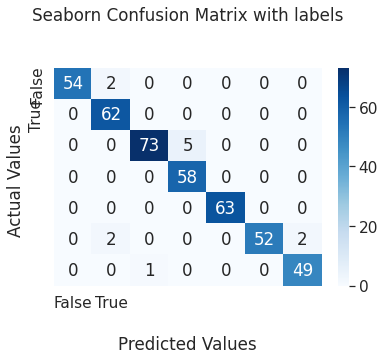

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
dfe=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dfe

,Actual,Predicted
544,0,0
1987,4,4
420,0,0
527,0,0
196,1,1
...,...,...
447,5,5
1793,3,3
73,1,1
1711,3,3


                                           Importance
Gender                                       0.099074
Age                                          0.003272
Height                                       0.004266
Weight                                       0.005972
Family History with Overweight               0.002131
Frequent consumption of high caloric food    0.003079
Frequency of consumption of vegetables       0.004096
Number of main meals                         0.002242
Consumption of food between meals            0.000000
Smoke                                        0.000000
Consumption of water daily                   0.001230
Calories consumption monitoring              0.000000
Physical activity frequency                  0.012486
Time using technology devices                0.000423
Consumption of alcohol                       0.000444
Transportation used                          0.003755
Body Mass Index                              0.857531


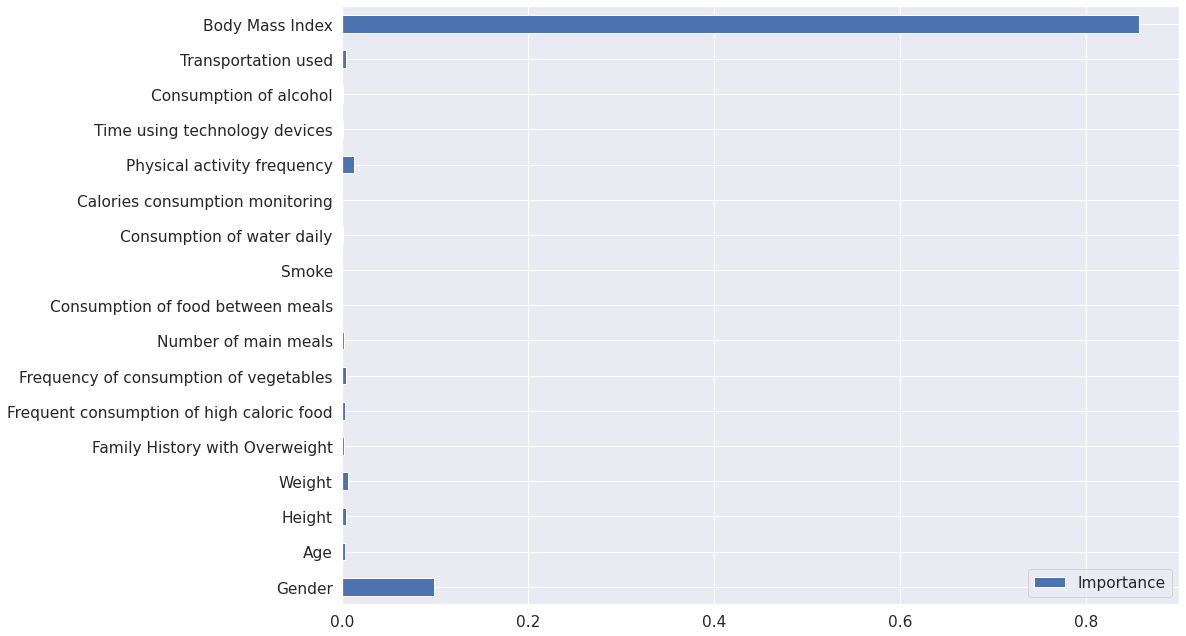

In [ ]:
# Assessing columns significance
def sig (s):
    feature= s.drop(columns="Obesity")
    dfimportance0=pd.DataFrame(dectree.feature_importances_,feature.columns,columns=['Importance'])
    dfimportance0.plot(kind='barh',figsize=(15,11))
    print(dfimportance0)

sig (obese3)

- As now is clear with our analysis, the obesity classification is vastly based on the BMI values. It is the feature of utmost importance followed bgy gender.

## **UNSUPERVISED MODELLING**

# **HIERARCHICAL CLUSTERING**

In [ ]:
# We first start by importing the relevant libraries
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn libraries
from sklearn import preprocessing
from sklearn.decomposition import PCA

#hierarchial clustering libraries
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
# Because our clustering should be unsupervised, we need to drop the target label
obese1 = obese1.drop(columns="Obesity")
obese1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'Smoke',
       'Consumption of water daily', 'Calories consumption monitoring',
       'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Body Mass Index'],
      dtype='object')

In [ ]:
obese1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

In [ ]:
#A code to label encode every variable of the datatype object
def label_encode (l):
    from sklearn import preprocessing 
    le = preprocessing.LabelEncoder()
    l[l.select_dtypes(include=['object']).columns] = l[l.select_dtypes(include=['object']).columns].apply(le.fit_transform)
    return l.head()

label_encode(obese1)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Body Mass Index
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,28.342381


In [ ]:
# #Lets now standardize the dataset
# x = obese.values
# Standard_scaler = preprocessing.StandardScaler()
# x_scaled = Standard_scaler.fit_transform(x)
# obese_scaled = pd.DataFrame(x_scaled, index = obese.index, 
#                               columns = obese.columns)
# obese_scaled.head()

In [ ]:
#select columns
X = obese1[obese1.columns[12:18]]
X

,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Body Mass Index
0,0.000000,1.000000,3,3,24.386526
1,3.000000,0.000000,2,3,24.238227
2,2.000000,1.000000,1,3,23.765432
3,2.000000,0.000000,1,4,26.851852
4,0.000000,0.000000,2,3,28.342381
...,...,...,...,...,...
2106,1.676269,0.906247,2,3,44.901475
2107,1.341390,0.599270,2,3,43.741923
2108,1.414209,0.646288,2,3,43.543817
2109,1.139107,0.586035,2,3,44.071535


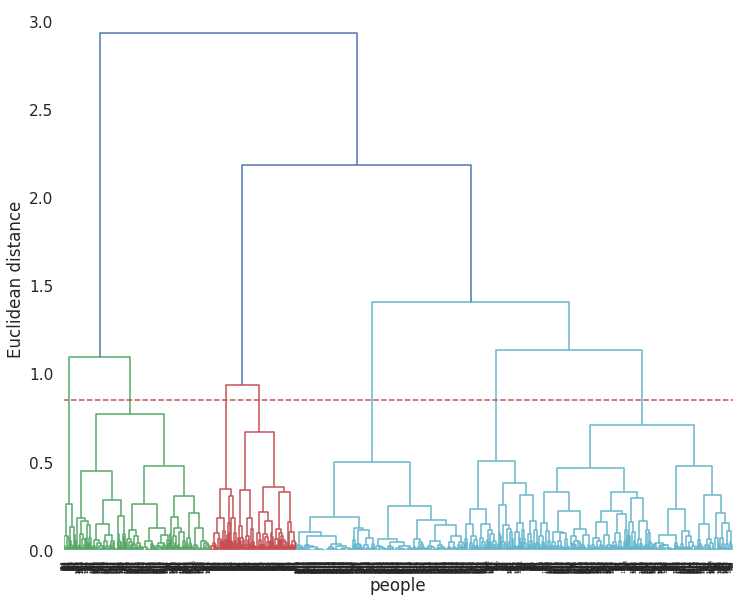

In [ ]:
#so we plot the dendrogram

X = obese1[obese1.columns[12:17]]
X = preprocessing.normalize(X)
plt.figure(figsize=(12, 10))  
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=0.85, color='r', linestyle='--')
# plt.title('Obesity Hierarchial Clustering Dendrogram')
plt.xlabel('people')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#Using a bottom up approach we settle on the 7 clusters
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters= 7, affinity= 'euclidean', linkage= 'ward')
y_hc=hc.fit_predict(X)
y_hc

array([1, 4, 4, ..., 3, 3, 3])

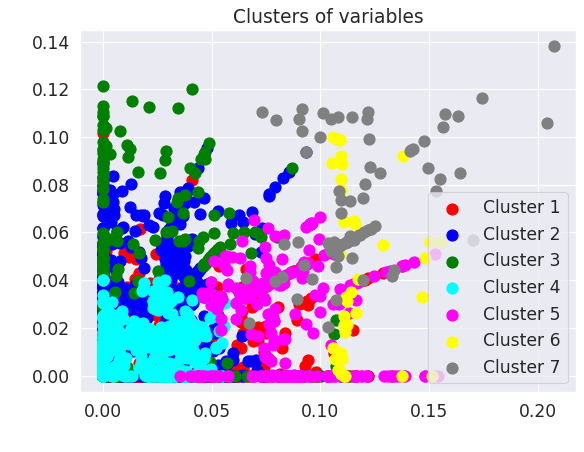

In [ ]:
#Lets now plot the clusters in a 2d plot
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(X[y_hc == 6, 0], X[y_hc == 6, 1], s = 100, c = 'grey', label = 'Cluster 7')
plt.title('Clusters of variables')
plt.xlabel(" ")
plt.ylabel(' ')
plt.legend()
plt.show()



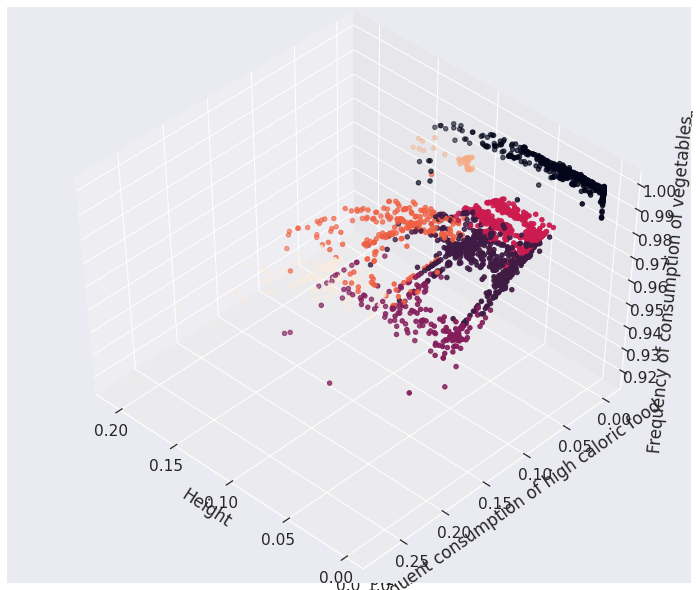

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(10,8))
plt.clf()
ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
plt.cla()
ax.set_xlabel("people")
ax.set_ylabel("")
ax.set_zlabel("")

for i in range (1,4):
    ax = Axes3D(fig,rect=[0,0,0.95,1],elev=48,azim=134)
    plt.cla()
    ax.set_xlabel(obese.columns[2])
    ax.set_ylabel(obese.columns[2+i])
    ax.set_zlabel(obese.columns[3+i])
    ax.scatter(X[:,0],X[:,i],X[:,i+1],c=y_hc.astype(float))

In [ ]:
# Renaming the column names by replacing the abbreviations

def rename ():
    obese2.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family_History_with_Overweight',
       'Frequent_consumption_of_high_caloric_food', 'Frequency_of_consumption_of_vegetables', 'Number_of_main_meals', 'Consumption_of_food_between_meals', 'Smoke', 'Consumption_of_water_daily', 'Calories_consumption_monitoring', 'Physical_activity_frequency', 'Time_using_technology_devices',
       'Consumption_of_alcohol', 'Transportation_used', 'Obesity', 'body_mass_index']
    return obese2.head()
rename()

,Gender,Age,Height,Weight,Family_History_with_Overweight,Frequent_consumption_of_high_caloric_food,Frequency_of_consumption_of_vegetables,Number_of_main_meals,Consumption_of_food_between_meals,Smoke,Consumption_of_water_daily,Calories_consumption_monitoring,Physical_activity_frequency,Time_using_technology_devices,Consumption_of_alcohol,Transportation_used,Obesity,body_mass_index
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II,28.342381


In [ ]:
# Changing all column names to lower case
obese2.columns = obese2.columns.str.lower()
# Checking changes
obese2.columns

Index(['gender', 'age', 'height', 'weight', 'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'frequency_of_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'smoke',
       'consumption_of_water_daily', 'calories_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol', 'transportation_used', 'obesity',
       'body_mass_index'],
      dtype='object')

# **K MEANS CLUSTERING**

In [ ]:
# loading libraries
# !pip install pip 22.1.2
# !pip install --upgrade kneed
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement 22.1.2 (from versions: none)
ERROR: No matching distribution found for 22.1.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Explore obesity variable

In [ ]:
# view the labels in the variable
obese2 = obese2.drop(columns="body_mass_index")
df = obese2
df['obesity'].unique()

array(['Normal Weight', 'Overweight Level I', 'Overweight Level II',
       'Obesity Type I', 'Insufficient Weight', 'Obesity Type II',
       'Obesity Type III'], dtype=object)

In [ ]:
df.shape

(2111, 17)

In [ ]:
len(df['obesity'].unique())

7

We can see that there are 7 categories of labels in the status_type variable.

Generate the synthetic data and labels i.e.
Declare feature vector and target variable 


In [ ]:
X = df.drop(['obesity'], axis=1)

y = df['obesity']
y

0             Normal Weight
1             Normal Weight
2             Normal Weight
3        Overweight Level I
4       Overweight Level II
               ...         
2106       Obesity Type III
2107       Obesity Type III
2108       Obesity Type III
2109       Obesity Type III
2110       Obesity Type III
Name: obesity, Length: 2111, dtype: object

## Convert categorical variable into numeric 

In [ ]:
# listing categorical variables
objList = X.select_dtypes(include = "object").columns
print (objList)


Index(['gender', 'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'consumption_of_food_between_meals', 'smoke',
       'calories_consumption_monitoring', 'consumption_of_alcohol',
       'transportation_used'],
      dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion

le = LabelEncoder()
X[objList] = X[objList].apply(le.fit_transform)
X[objList] = X[objList].apply(pd.to_numeric, errors='coerce')
la = LabelEncoder()
la.fit(y)
y = la.transform(y)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   gender                                     2111 non-null   int64  
 1   age                                        2111 non-null   float64
 2   height                                     2111 non-null   float64
 3   weight                                     2111 non-null   float64
 4   family_history_with_overweight             2111 non-null   int64  
 5   frequent_consumption_of_high_caloric_food  2111 non-null   int64  
 6   frequency_of_consumption_of_vegetables     2111 non-null   float64
 7   number_of_main_meals                       2111 non-null   float64
 8   consumption_of_food_between_meals          2111 non-null   int64  
 9   smoke                                      2111 non-null   int64  
 10  consumption_of_water_dai

In [ ]:
df = X.copy()

let us preview X

In [ ]:
X.head()

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


let us look at two clusters.

In [ ]:
# K-Means model with two clusters 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)  # k = 7

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

 K-Means model parameters study 

In [ ]:
kmeans.cluster_centers_

array([[6.01212121e-01, 2.54651692e+01, 1.74327681e+00, 1.14244911e+02,
        9.93939394e-01, 9.81818182e-01, 2.56964579e+00, 2.80566827e+00,
        1.97818182e+00, 2.30303030e-02, 2.10919768e+00, 2.42424242e-03,
        9.15503888e-01, 6.42588230e-01, 2.16242424e+00, 2.48000000e+00],
       [4.44790047e-01, 2.35731989e+01, 1.67499030e+00, 6.88422372e+01,
        7.04510109e-01, 8.21150855e-01, 2.32242778e+00, 2.60861936e+00,
        1.78304821e+00, 1.94401244e-02, 1.94309797e+00, 7.30948678e-02,
        1.07111021e+00, 6.67666932e-01, 2.33670295e+00, 2.29160187e+00]])

we will do pca if high dimensional spaces and euclidean distances get inflated.


Inertia

In [ ]:
kmeans.inertia_

504935.4804102435

We can see that the model has very high inertia. So, this is not a good model fit to the data.

The lesser the model inertia, the better the model fit.

## Check quality of weak classification by the model

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 287 out of 2111 samples were correctly labeled.


seems like we have 240 out of 2111 samples were labelled correctly. 

### accuracy

In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.14


We have achieved a weak classification accuracy of 14% by our unsupervised model with two clusters.

## Use elbow method to find optimal number of clusters 

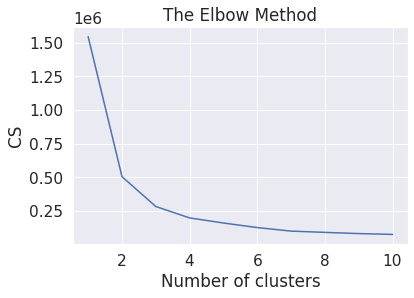

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

By the above plot, we can see that there is a kink at k=3. Hence k=3 can be considered a good number of the cluster to cluster this data.But, we have seen that we have achieved a weak classification accuracy of 11% with k=3.


## K-Means model with different clusters

K-Means model with 3 clusters

In [ ]:


kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))



Result: 486 out of 2111 samples were correctly labeled.
Accuracy score: 0.23


Our accuracy has dropped UP to 23% with 3 clusters. Let us see with 4 clusters next.

K-Means model with 4 clusters

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 79 out of 2111 samples were correctly labeled.
Accuracy score: 0.04


from above we can see that with 4 clusters, we achieved an accuracy of 4% showing that the more the value of k the less accurate the model.

Let us now compare k means to other types of clustering algorithms.

# Density Based Spacial Clustering of Applications with noise (DBSCAN)

Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.
Steps in DBSCAN

* The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).
* If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.
* The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point

## Why do we need a Density-Based clustering algorithm like DBSCAN when we already have K-means clustering?

K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.

What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions. Below figure illustrates the fact:



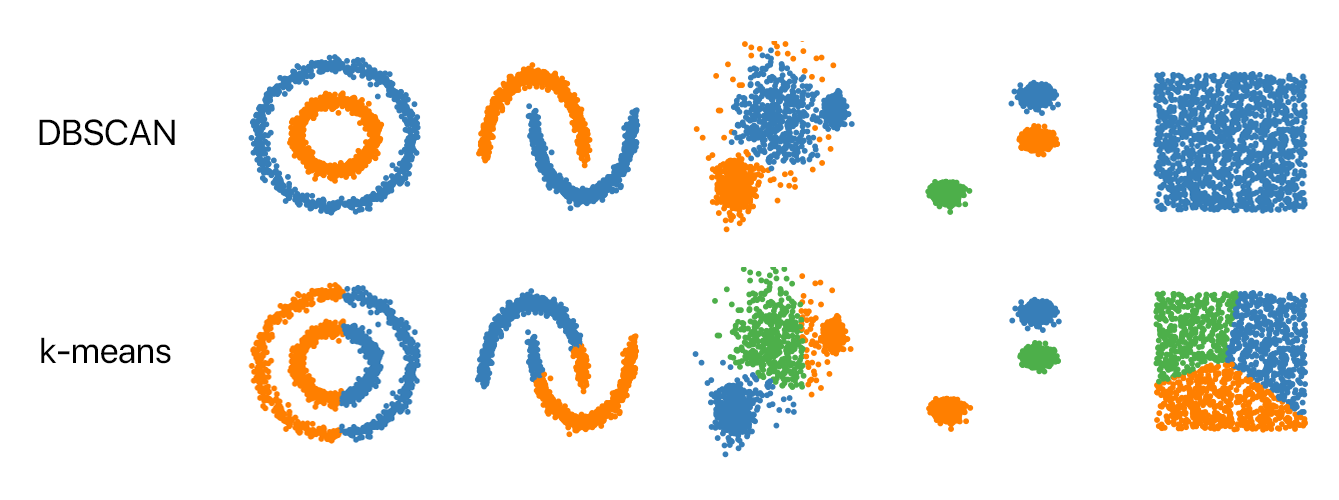

## Model

### PCA

**IMPORTING LIBRARIES**

In [ ]:
# Importing Libraries
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets import make_blobs
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Apply Principle Component Anaylsis for visualizing the data in 2D space.

pca = PCA()
pca_data = pca.fit_transform(df)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(df.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

pca.explained variance ratio:
  0.941 0.054 0.001 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000


In [ ]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            df.columns)))

1 component: 94.06% of initial variance
0.003 x gender + 0.052 x age + 0.002 x height + 0.999 x weight + 0.007 x family_history_with_overweight + 0.003 x frequent_consumption_of_high_caloric_food + 0.004 x frequency_of_consumption_of_vegetables + 0.003 x number_of_main_meals + 0.005 x consumption_of_food_between_meals + 0.000 x smoke + 0.005 x consumption_of_water_daily + -0.002 x calories_consumption_monitoring + -0.002 x physical_activity_frequency + -0.002 x time_using_technology_devices + -0.004 x consumption_of_alcohol + -0.000 x transportation_used
2 component: 5.36% of initial variance
0.001 x gender + 0.990 x age + -0.002 x height + -0.052 x weight + 0.006 x family_history_with_overweight + 0.000 x frequent_consumption_of_high_caloric_food + -0.003 x frequency_of_consumption_of_vegetables + -0.008 x number_of_main_meals + 0.002 x consumption_of_food_between_meals + 0.002 x smoke + -0.009 x consumption_of_water_daily + -0.002 x calories_consumption_monitoring + -0.019 x physical

* In PC1 --- 99.9% variance is by Weight
* In PC2 ---99% variance is by Age

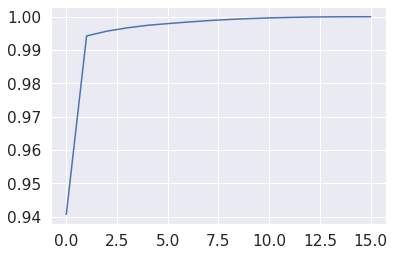

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

* PCA is used to visualize the data.
* From the Explanied Variance Ratio graph, the first two principle component can explain 99.5% of the all variance. Also, there is an elbow after the second principle component, so pc1 and pc2 are enough for representing this data. 

### Find optimal parameter setting for DBSCAN.

In [ ]:
epsilon = [1,1.25,1.5,1.75, 2,2.25,2.5,2.75, 3,3.25,3.5,3.75, 4]
min_samples = [10,15,20,25]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
        silhouette_avg = metrics.silhouette_score(df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 3.25 
min_sample= 25 
number of clusters= 8 
average silhouette score= 0.0774


* The model (epsilon = 3.25 and min_sample = 25) which has 0.0774 maximum average silhouette score has the optimal number of cluster; 8.

### DBSCAN

In [ ]:
# Apply DBSCAN

db = DBSCAN(eps=3.25, min_samples=25).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df, labels))

Estimated number of clusters: 8
Estimated number of noise points: 582
Silhouette Coefficient: 0.077


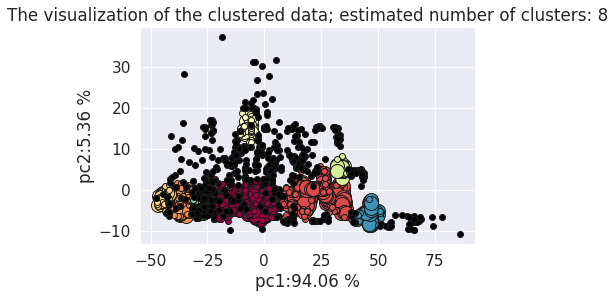

In [ ]:
# Plot result
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = df.copy() # data1 is created, we do not want to change original data as adding the cluster column.

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0,1]

    class_member_mask = (labels == k)

    xy = pca_data1[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data1[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('The visualization of the clustered data; estimated number of clusters: %d' % n_clusters_)
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()

* 8 clusters are identified by DBSCAN algorithm. The result is plotted in terms of pc1 and pc2. Black points in the graph represent the outliers.

In [ ]:
def predict(db, x):
  dists = np.sqrt(np.sum((db.components_ - x)**2, axis=1))
  i = np.argmin(dists)
  return db.labels_[db.core_sample_indices_[i]] if dists[i] < db.eps else -1

X_test = np.array([[0, 0,0, 0 ,0, 0,0,0,0,0,0,0,0,0,0,0]])
for i in range(len(X_test)):
   print('test point: {}, predicted label: {}'.format(X_test[i], 
                                               predict(db, X_test[i])))

test point: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], predicted label: -1


In [ ]:
# save the model to disk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

filename = 'model.pkl'
pickle.dump(db, open(filename, 'wb'))

In [ ]:
# download the file
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Labels

In [ ]:
# Let's create a new column with the generated cluster labels
df['labels'] = labels
df.head(10)

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,labels
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,-1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,0
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,-1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,2
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,2
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,0
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,0


In [ ]:
# Unique
df.labels.unique()

array([ 0,  2, -1,  1,  3,  6,  4,  5,  7])

## Conclusion

Using DBSCAN, We get 8 different categories/labels. -1 Label is for outliers thus we remain with 7 labels. Remember, our dataset had seven target variables i.e:

* 'Normal_Weight' 
* 'Overweight_Level_I' 
* 'Overweight_Level_II'
* 'Obesity_Type_I' 
* 'Insufficient_Weight' 
* 'Obesity_Type_II'
* 'Obesity_Type_III'

With the relevant domain knowledge, we will assign the 7 labels to these obesity categories.

In [ ]:
# Based on domain knowledge, I am renaming the clusters.
df['labels'] = df['labels'].map({
    -1: 'Outlier',
    0: 'Normal_Weight', 
    1: 'Overweight_Level_I', 
    2: 'Overweight_Level_II', 
    3: 'Obesity_Type_I', 
    4: 'Insufficient_Weight',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'}) 
df.head(20)

,gender,age,height,weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,labels
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Overweight_Level_II
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Outlier
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Normal_Weight
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,Outlier
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,Overweight_Level_II
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,Overweight_Level_II
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,Normal_Weight
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,Normal_Weight
